In [ ]:
from math import *
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import scipy.linalg as scpl
from tqdm import tqdm
'''
начальное состояние: 101
спины атомов сонаправлены (образование молекулы невозможно)
ковалентной связи нет
нет фононов
'''

'\nначальное состояние: 101\nспины атомов сонаправлены (образование молекулы невозможно)\nковалентной связи нет\nнет фононов\n'

In [ ]:
h = 1
w = 1
k = 1
gc = 1
g0 = 1
gam = 5
d_t = 0.0001
epochs = 1000000

In [ ]:
def P(t, n):
    return exp(-h*w*n/k/t)

In [ ]:
def N_av(t):
    i = 0
    ad = P(t, i)
    sum = ad
    n_sum = 0
    i += 1
    while ad > 0.0000001:
        ad = P(t, i)
        sum += ad
        n_sum += ad * i
        i += 1
    c = 1 / sum
    return c * n_sum

In [ ]:
# улет фонона из полости
b = np.array([
    [0, 0, 1, 0], # |000> состояние стабильной молекулы (спины антипараллельны, связь есть, фонон улетел)
    [0, 0, 0, 0], # |001> возможно образование молекулы (спины атомов антипараллельны, ковалентной связи нет, фононов нет)
    [0, 0, 0, 0], # |010> состояние нестабильной молекулы (спины антипараллельны, свящь есть, есть фонон)
    [0, 0, 0, 0]  # |101> начальное состояние (образование молекулы невозможно) 
])

b_p = np.transpose(b)

In [ ]:
H1 = np.array([
    [0.0, 0.0, 0.0, 0.0],
    [0.0, h * w, gc, 0.0],
    [0.0, gc, h * w, 0.0],
    [0.0, 0.0, 0.0, h * w],
])

In [ ]:
def L(rho):
    return gam * (b @ rho @ b_p - 0.5 * (b_p @ b @ rho + rho @ (b_p @ b)))

In [ ]:
rho_0 = np.zeros((4, 4))
rho_0[3][3] = 1

In [ ]:
# g_273 - вероятность перехода спинов атомов в из параллельного состояния в антипараллельное при 0 градусов цельсия (273 К)
g_273 = sqrt(N_av(273)) * g0
H = H1.copy()
H[3][1] += g_273
H[1][3] += g_273

In [ ]:
rho_273 = []
rho = rho_0.copy()
rho_273.append(np.abs(rho[0][0]))

for i in tqdm(range(epochs)):
    d_rho = complex(0, -1) * (H @ rho - rho @ H) / h + L(rho) / h
    rho = rho + d_t * d_rho
    rho_273.append(np.abs(rho[0][0]))
    if not (i % 10):
        rho = (rho + np.conj(np.transpose(rho))) * 0.5
        rho = rho / np.trace(rho)

100%|██████████| 1000000/1000000 [00:44<00:00, 22359.65it/s]


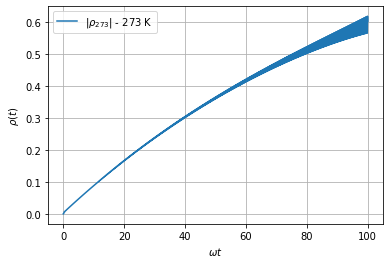

In [ ]:
x_mesh = np.linspace(0, (len(rho_273)-1) * d_t, len(rho_273))
plt.plot(x_mesh, rho_273, label = "$|\\rho_{273}|$ - 273 K")
plt.legend()
plt.xlabel("$\\omega t$")
plt.ylabel("$\\rho(t)$")
plt.grid()
plt.show()
# осцилляции Раби в переходе |001> <---> |010>

In [ ]:
g_1 = sqrt(N_av(1)) * g0
H = H1.copy()
H[3][1] += g_1
H[1][3] += g_1

In [ ]:
rho_1 = []
rho = rho_0.copy()
rho_1.append(np.abs(rho[0][0]))


for i in tqdm(range(epochs)):
    d_rho = complex(0, -1) * (H @ rho - rho @ H) / h + L(rho) / h
    rho = rho + d_t * d_rho
    rho_1.append(np.abs(rho[0][0]))
    if not (i % 10):
        rho = (rho + np.conj(np.transpose(rho))) * 0.5
        rho = rho / np.trace(rho)

100%|██████████| 1000000/1000000 [00:46<00:00, 21653.18it/s]


In [ ]:
g_10 = sqrt(N_av(10)) * g0
H = H1.copy()
H[3][1] += g_10
H[1][3] += g_10

In [ ]:
rho_10 = []
rho = rho_0.copy()
rho_10.append(np.abs(rho[0][0]))


for i in tqdm(range(epochs)):
    d_rho = complex(0, -1) * (H @ rho - rho @ H) / h + L(rho) / h
    rho = rho + d_t * d_rho
    rho_10.append(np.abs(rho[0][0]))
    if not (i % 10):
        rho = (rho + np.conj(np.transpose(rho))) * 0.5
        rho = rho / np.trace(rho)

100%|██████████| 1000000/1000000 [00:44<00:00, 22425.87it/s]


In [ ]:
g_50 = sqrt(N_av(50)) * g0
H = H1.copy()
H[3][1] += g_50
H[1][3] += g_50

In [ ]:
rho_50 = []
rho = rho_0.copy()
rho_50.append(np.abs(rho[0][0]))


for i in tqdm(range(epochs)):
    d_rho = complex(0, -1) * (H @ rho - rho @ H) / h + L(rho) / h
    rho = rho + d_t * d_rho
    rho_50.append(np.abs(rho[0][0]))
    if not (i % 10):
        rho = (rho + np.conj(np.transpose(rho))) * 0.5
        rho = rho / np.trace(rho)

100%|██████████| 1000000/1000000 [00:44<00:00, 22609.57it/s]


In [ ]:
g_100 = sqrt(N_av(100)) * g0
H = H1.copy()
H[3][1] += g_100
H[1][3] += g_100

In [ ]:
rho_100 = []
rho = rho_0.copy()
rho_100.append(np.abs(rho[0][0]))


for i in tqdm(range(epochs)):
    d_rho = complex(0, -1) * (H @ rho - rho @ H) / h + L(rho) / h
    rho = rho + d_t * d_rho
    rho_100.append(np.abs(rho[0][0]))
    if not (i % 10):
        rho = (rho + np.conj(np.transpose(rho))) * 0.5
        rho = rho / np.trace(rho)

100%|██████████| 1000000/1000000 [00:44<00:00, 22357.88it/s]


In [ ]:
g_20 = sqrt(N_av(20)) * g0
H = H1.copy()
H[3][1] += g_20
H[1][3] += g_20

In [ ]:
rho_20 = []
rho = rho_0.copy()
rho_20.append(np.abs(rho[0][0]))


for i in tqdm(range(epochs)):
    d_rho = complex(0, -1) * (H @ rho - rho @ H) / h + L(rho) / h
    rho = rho + d_t * d_rho
    rho_20.append(np.abs(rho[0][0]))
    if not (i % 10):
        rho = (rho + np.conj(np.transpose(rho))) * 0.5
        rho = rho / np.trace(rho)

100%|██████████| 1000000/1000000 [00:44<00:00, 22484.50it/s]


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


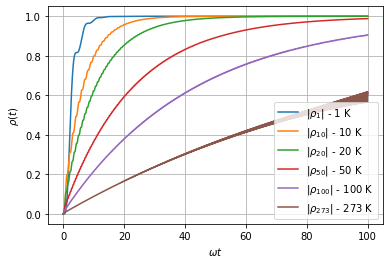

In [ ]:
x_mesh = np.linspace(0, (len(rho_1)-1) * d_t, len(rho_1))
plt.plot(x_mesh, rho_1, label = "$|\\rho_{1}|$ - 1 K")
plt.plot(x_mesh, rho_10, label = "$|\\rho_{10}|$ - 10 K")
plt.plot(x_mesh, rho_20, label = "$|\\rho_{20}|$ - 20 K")
plt.plot(x_mesh, rho_50, label = "$|\\rho_{50}|$ - 50 K")
plt.plot(x_mesh, rho_100, label = "$|\\rho_{100}|$ - 100 K")
plt.plot(x_mesh, rho_273, label = "$|\\rho_{273}|$ - 273 K")
plt.legend()
plt.xlabel("$\\omega t$")
plt.ylabel("$\\rho(t)$")
plt.grid()
plt.show()
# со снижением температуры состояния |001> с антипараллельными спинами стабильными, осцилляции Раби становятся более медленными
# с понижением температуры коэффициент перехода |101>  <---> |001> снижается